# Useful codes from notes

## OLS – your own code (with numpy pseudoinverse)

In [ ]:
# matrix inversion to find beta
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Energies)
# and then make the prediction
ytilde = X @ beta

In [ ]:
def beta_OLS(X,y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y #!!!

###################################################
beta = beta_OLS(X_train, y_train)
print("Beta opt: ", beta)
# and then make the prediction
ytilde = X_train @ beta
print("Training R2: ", round(R2(y_train,ytilde),3))
print("Training MSE: ", round(MSE(y_train,ytilde),3))
ypredict = X_test @ beta
print("Test R2: ", round(R2(y_test,ypredict),3))
print("Test MSE: ", round(MSE(y_test,ypredict),3))

## OLS – numpy

In [ ]:
fit = np.linalg.lstsq(X, y, rcond =None)[0]
ytildenp = np.dot(fit,X.T)

## OLS & error analysis – sk

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

But if you need a polynomial fit:

See the examples at the 
- [https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py] 
- [https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py] .


And underfitting VS overfitting:
- [https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py]

In [ ]:
model = make_pipeline(PolynomialFeatures(3), LineareRegression())
model.fit(this_X, this_y)
y_plot = model.predict(x_plot[:, np.newaxis])

## Error analysis – your own code

In [ ]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def RelativeError(y_data,y_model):
    return abs((y_data-y_model)/y_data)

## Test and train – sk

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)


#  The design matrix now as function of a given polynomial
X = np.zeros((len(x),3))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(beta)
# and then make the prediction
ytilde = X_train @ beta
print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
ypredict = X_test @ beta
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

## Test and train – numpy

## Scaling

In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import numpy as np

np.random.seed(100)
# setting up a 10 x 5 matrix
rows = 10
cols = 5
X = np.random.randn(rows,cols)

###############################################################
#  This option does not include the standard deviation
scaler = StandardScaler(with_std=False)
scaler.fit(X)
Xscaled = scaler.transform(X)
######################################################

## MSE VS Complexity

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


np.random.seed(2018)
n = 50
maxdegree = 5
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_train_scaled,y_train)
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled) 
    polydegree[degree] = degree
    TestError[degree] = np.mean( np.mean((y_test - y_pred)**2) )
    TrainError[degree] = np.mean( np.mean((y_train - y_fit)**2) )

plt.plot(polydegree, TestError, label='Test Error')
plt.plot(polydegree, TrainError, label='Train Error')
plt.legend()
plt.show()

## FrankeFunction

In [ ]:
def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4

## Create X

In [ ]:
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

## <font color=grey>SVD - basics (not so useful)</font>

Returns U,S,VT. 

**NB:** S is a vector of the singular values.

As you can see from the code, the $S$ vector must be converted into a
diagonal matrix. This may cause a problem as the size of the matrices
do not fit the rules of matrix multiplication, where the number of
columns in a matrix must match the number of rows in the subsequent
matrix.

If you wish to include the zero singular values, you will need to
resize the matrices and set up a diagonal matrix as done in the above
example

In [5]:
import numpy as np
# SVD inversion
def SVD(A):
    ''' Takes as input a numpy matrix A and returns A (!!!) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    """print('test U')
    print( (np.transpose(U) @ U - U @ np.transpose(U)))
    print('test VT')
    print( (np.transpose(VT) @ VT - VT @ np.transpose(VT)))
    print(U)
    print(S)
    print(VT)"""

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=S[i]
    return U @ D @ VT #X


X = np.array([ [1.0,-1.0], [1.0,-1.0]])
#X = np.array([[1, 2], [3, 4], [5, 6]])

#print(X)
C = SVD(X)
# Print the difference between the original matrix and the SVD one
print(np.round_(C-X,3))
print("If all 0, then SVD works well!")

[[-0.  0.]
 [ 0.  0.]]
If all 0, then SVD works well!


## <font color=grey>Inverse with SVD (simple matrix)</font>
Let us first look at a matrix which does not causes problems and write our own function where we just use the SVD.

In [15]:
import numpy as np
# SVD inversion
def SVDinv(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, s, VT = np.linalg.svd(A)
    """print('test U')
    print( (np.transpose(U) @ U - U @np.transpose(U)))
    print('test VT')
    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))"""


    D = np.zeros((len(U),len(VT)))
    D = np.diag(s)
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))


#X = np.array([ [1.0, -1.0, 2.0], [1.0, 0.0, 1.0], [1.0, 2.0, -1.0], [1.0, 1.0, 0.0] ])
# Non-singular square matrix
X = np.array( [ [1,2,3],[2,4,5],[3,5,6]])
#print(X)
A = np.transpose(X) @ X
# Brute force inversion
B = np.linalg.inv(A)  # here we could use np.linalg.pinv(A)
C = SVDinv(A)
print(np.round_(np.abs(B-C)))

[[1 2 3]
 [2 4 5]
 [3 5 6]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## Inverse with SVD (singular matrix) $\leftarrow$ !!!

In [ ]:
import numpy as np
# SVD inversion
def SVDinv(A):
    U, s, VT = np.linalg.svd(A)
    # reciprocals of singular values of s
    d = 1.0 / s
    # create m x n D matrix
    D = np.zeros(A.shape)
    # populate D with n x n diagonal matrix
    D[:A.shape[1], :A.shape[1]] = np.diag(d)
    UT = np.transpose(U)
    V = np.transpose(VT)
    return np.matmul(V,np.matmul(D.T,UT))

#Non-singular:
#X = np.array( [ [1,2,3],[2,4,5],[3,5,6]])
#A = np.transpose(X) @ X
#Singular:
A = np.array([ [0.3, 0.4], [0.5, 0.6], [0.7, 0.8],[0.9, 1.0]])
print("A\n", A)
# Brute force inversion of super-collinear matrix
B = np.linalg.pinv(A)
print("invA_np:\n", B)
# Compare our own algorithm with pinv
C = SVDinv(A)
print("invA_svd:\n",C)
print("diff:",np.round_(np.abs(C-B),3))

## All correlation and covariance stuff [...]

$$
\tilde{\boldsymbol{y}}_{\mathrm{OLS}}=\boldsymbol{X}\boldsymbol{\beta}  =\boldsymbol{U}\boldsymbol{U}^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\boldsymbol{y}.
$$
$$
\tilde{\boldsymbol{y}}_{\mathrm{Ridge}}=\boldsymbol{X}\boldsymbol{\beta}_{\mathrm{Ridge}} = \boldsymbol{U\Sigma V^T}\left(\boldsymbol{V}\boldsymbol{\Sigma}^2\boldsymbol{V}^T+\lambda\boldsymbol{I} \right)^{-1}(\boldsymbol{U\Sigma V^T})^T\boldsymbol{y}=\sum_{j=0}^{p-1}\boldsymbol{u}_j\boldsymbol{u}_j^T\frac{\sigma_j^2}{\sigma_j^2+\lambda}\boldsymbol{y},
$$
$$
\boldsymbol{\beta}^{\mathrm{Ridge}} = \left(\boldsymbol{I}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}=\left(1+\lambda\right)^{-1}\boldsymbol{\beta}^{\mathrm{OLS}},
$$

## Ridge - your own code

In [ ]:
Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y #why not pinv?

## Ridge & Lasso - MSE VS lambda – your own code

[ 2.03099776 -0.17917768  5.18029127]
Training MSE for OLS
0.009163470508352214
Test MSE OLS
0.008675369724976355


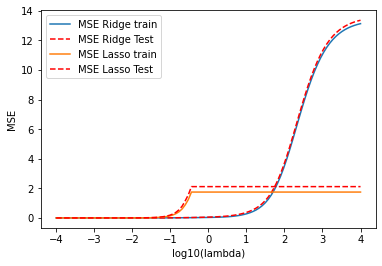

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

x = np.random.rand(100)
y = 2.0+5*x*x+0.1*np.random.randn(100)

# number of features p (here degree of polynomial
p = 3
#  The design matrix now as function of a given polynomial
X = np.zeros((len(x),p))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x*x
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
# and then make the prediction
ytildeOLS = X_train @ OLSbeta
print("Training MSE for OLS")
print(MSE(y_train,ytildeOLS))
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))

# Repeat now for Lasso and Ridge regression and various values of the regularization parameter
I = np.eye(p,p)
# Decide which values of lambda to use
nlambdas = 100
MSEPredict = np.zeros(nlambdas)
MSETrain = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
MSELassoTrain = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train
    # include lasso using Scikit-Learn
    RegLasso = linear_model.Lasso(lmb)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ytildeRidge = X_train @ Ridgebeta
    ypredictRidge = X_test @ Ridgebeta
    ytildeLasso = RegLasso.predict(X_train)
    ypredictLasso = RegLasso.predict(X_test)
    MSEPredict[i] = MSE(y_test,ypredictRidge)
    MSETrain[i] = MSE(y_train,ytildeRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    MSELassoTrain[i] = MSE(y_train,ytildeLasso)

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSETrain, label = 'MSE Ridge train')
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoTrain, label = 'MSE Lasso train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r--', label = 'MSE Lasso Test')

plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()


*Comments:*

We see here that we reach a plateau. What is actually happening?

*Because $\beta$-values stabilize at 0 and the difference in between model and real values go constant.*

*If $\lambda \rightarrow 0$ gets closer and closer to best result (OLS's).*

*Comments:*
- Lasso is much lower (first plateau)
- Lasso drags the beta-values to 0

*$\rightarrow$ typical behaviour of Lasso Regression.*

**Much better result for our model!!**

*Comments:*
- Again OLS gives the best result, but Lasso do a good job up to when $\lambda$ doesnt hit a certain value.

## Ridge & Lasso - MSE VS lambda - SK

[ 1.0169643   0.27924636 -1.4087793   1.03308408  0.        ]
Test MSE OLS
0.9582286166520751
0.001 [ 1.0170259   0.27852549 -1.40702     1.03193199  0.        ]
0.001 [ 1.034342   -0.18063928 -0.          0.          0.        ]
0.021544346900318832 [ 1.01825571  0.26412372 -1.37186301  1.00890601  0.        ]
0.021544346900318832 [ 0.92280994 -0.         -0.         -0.          0.        ]
0.46415888336127775 [ 1.0344707   0.07160764 -0.89928965  0.69843037  0.        ]
0.46415888336127775 [0.48019541 0.         0.         0.         0.        ]
10.0 [ 1.04529095 -0.18224665 -0.15751596  0.16831012  0.        ]
10.0 [0. 0. 0. 0. 0.]


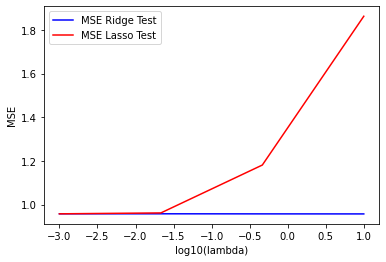

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

# Make data set.
n = 10000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# matrix inversion to find beta
OLSbeta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
print(OLSbeta)
ypredictOLS = X_test @ OLSbeta
print("Test MSE OLS")
print(MSE(y_test,ypredictOLS))
# Repeat now for Lasso and Ridge regression and various values of the regularization parameter using Scikit-Learn
# Decide which values of lambda to use
nlambdas = 4
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-3, 1, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge and Lasso
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    RegLasso = linear_model.Lasso(lmb,fit_intercept=False)
    RegLasso.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    ypredictLasso = RegLasso.predict(X_test)
    # Compute the MSE and print it
    MSERidgePredict[i] = MSE(y_test,ypredictRidge)
    MSELassoPredict[i] = MSE(y_test,ypredictLasso)
    print(lmb,RegRidge.coef_)
    print(lmb,RegLasso.coef_)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'b', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSELassoPredict, 'r', label = 'MSE Lasso Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Resampling algorithms:

### Jackknife

In [ ]:
from numpy import *
from numpy.random import randint, randn
from time import time

def jackknife(data, stat):
    n = len(data);t = zeros(n); inds = arange(n); t0 = time()
    ## 'jackknifing' by leaving out an observation for each i                                                                                                                      
    for i in range(n):
        t[i] = stat(delete(data,i) )

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Jackknife Statistics :")
    print("original           bias      std. error")
    print("%8g %14g %15g" % (stat(data),(n-1)*mean(t)/n, (n*var(t))**.5))

    return t


# Returns mean of data samples                                                                                                                                                     
def stat(data):
    return mean(data)


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# jackknife returns the data sample                                                                                                                                                
t = jackknife(x, stat)

### Bootstrap

### Cross-validation

## Useful examples

In [ ]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)    
# split in training and test data
X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)


clf = skl.LinearRegression().fit(X_train, y_train)

# The mean squared error and R2 score
print("MSE before scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test), y_test)))
print("R2 score before scaling {:.2f}".format(clf.score(X_test,y_test)))

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature min values before scaling:\n {}".format(X_train.min(axis=0)))
print("Feature max values before scaling:\n {}".format(X_train.max(axis=0)))

print("Feature min values after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("Feature max values after scaling:\n {}".format(X_train_scaled.max(axis=0)))

clf = skl.LinearRegression().fit(X_train_scaled, y_train)


print("MSE after  scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test_scaled), y_test)))
print("R2 score for  scaled data: {:.2f}".format(clf.score(X_test_scaled,y_test)))

### Introducing pandas

<font color=red>*Reminder:*
- organize in panads
- an idea is to show $\beta$ as a function of the order of the polinomial $\rightarrow$ table with order-of-ply on the horizontal VS $\beta$-values on the vertical.</font>

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Make data set.
n = 1000
x = np.random.rand(n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.randn(n)

Maxpolydegree = 5
X = np.zeros((len(x),Maxpolydegree))
X[:,0] = 1.0

for polydegree in range(1, Maxpolydegree):
    for degree in range(polydegree):
        X[:,degree] = x**(degree)


# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decide which values of lambda to use
nlambdas = 5
lambdas = np.logspace(-3, 2, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    # Make the fit using Ridge only
    RegRidge = linear_model.Ridge(lmb,fit_intercept=False)
    RegRidge.fit(X_train,y_train)
    # and then make the prediction
    ypredictRidge = RegRidge.predict(X_test)
    Coeffs = np.array(RegRidge.coef_)
    BetaValues = pd.DataFrame(Coeffs)
    BetaValues.columns = ['beta']
    print("Lmb:",lmb)
    display(BetaValues)

## Exercise 2: making your own data and exploring scikit-learn

We generate a dataset for a function $y(x)$ where $x \in [0,1]$ and defined by random numbers computed with the uniform distribution (with 100 data points). The function $y$ is a quadratic polynomial in $x$ with added stochastic noise according to the normal distribution $\cal {N}(0,1)$:

$$
y(x)=2+5x^2+0.1 \cal {N}(0,1)
$$

### Task

1. Write your own code for computing the parametrization of the data set fitting a second-order polynomial. 

- *Insert here your notes Adele*

$$ n=100, p=3 $$
$$ \tilde{y}(x_{i})=\beta_{0}+\beta_{1}x_{i}+\beta_{2}x_{i}^2 \\ \forall i=0...99$$

$$
\chi=\begin{bmatrix}
    1& x_{0} & x_{0}^2 \\
    1& x_{1} & x_{1}^2 \\
    \dots \\
    1& x_{99} & x_{99}^2 
\end{bmatrix} \rightarrow \text{FEATURE MATRIX (KNOWN)}
$$

What we need to know is **PARAMETERS VECTOR**:
$$\beta=\begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \beta_{2}
\end{bmatrix}=?
$$

How? **MINIMIZING THE MSE (cost function)**
$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

through the **Linear Regressione Equation**:

$$ \hat{\beta}=(\chi^{T}\chi)^{-1}\chi^{T} y $$

2. Use thereafter **scikit-learn** (see again the examples in the regression slides) and compare with your own code.   

3. Using scikit-learn, compute also the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Beta [ 2.03685195 -0.19340718  5.19125332]


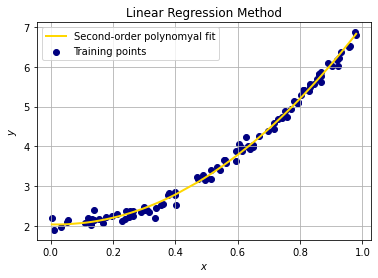

In [22]:
# Point 1

def f(x):
    return 2.0+5*x**2

def poly_X(x,p): # p=degree+1
    X = np.zeros((len(x),p))
    for i in range(0,p):
        X[:,i] = x**i
    return X

def beta_OLS(X,y):
    XT=X.transpose()
    return np.dot(np.dot(np.linalg.inv(np.dot(XT, X)),XT),y)

# 0. Generating Data
n=100
p=3 #second-order polynomial
x_data = np.sort(np.random.rand(n))
y_data = f(x_data)+0.1*np.random.randn(n) #(return a vector with 100 rows from gaussian distribution N(0,1))

#1. Build feature matrix:
X = poly_X(x_data,p)

#2. Linear Regression Equation:
beta = beta_OLS(X,y_data)
print("Beta", beta)

#3. Prediction
ytilde= X @ beta #print(ytilde)

#plt.plot(x_data, f(x_data), color='cornflowerblue', linewidth=2,label="ground truth")
plt.scatter(x_data, y_data, color='navy', marker='o', label="Training points")
plt.plot(x_data, ytilde, color='gold', linewidth=2,label="Second-order polynomyal fit")
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression Method')
plt.grid(True)
plt.show()

Beta opt:  [ 2.00461658 -0.04813624  5.07474612]
Training R2:  0.995
Training MSE:  0.01
Test R2:  0.993
Test MSE:  0.015


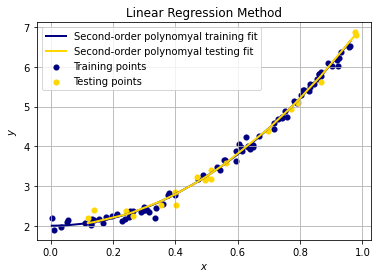

In [32]:
#Point 2
import pandas as pd
from sklearn.model_selection import train_test_split

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

x=x_data
y=y_data

#  The design matrix now as function of a given polynomial
X = np.zeros((len(x),3))
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("Beta opt: ", beta)
# and then make the prediction
ytilde = X_train @ beta
print("Training R2: ", round(R2(y_train,ytilde),3))
print("Training MSE: ", round(MSE(y_train,ytilde),3))
ypredict = X_test @ beta
print("Test R2: ", round(R2(y_test,ypredict),3))
print("Test MSE: ", round(MSE(y_test,ypredict),3))

plt.scatter(X_train[:,1], y_train, color='navy', marker='o', linewidth=0.1,label="Training points")
plt.scatter(X_test[:,1], y_test, color='gold', marker='o', linewidth=0.1,label="Testing points")
plt.plot(np.sort(X_train[:,1]), np.sort(ytilde), color='navy', linewidth=2,label="Second-order polynomyal training fit")
plt.plot(np.sort(X_test[:,1]), np.sort(ypredict), color='gold', linewidth=2,label="Second-order polynomyal testing fit")
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression Method')
plt.grid(True)
plt.show()

Comments: 
- Since the noise is very little compared to the data, we get a really good fit with beta-values very close to the real ones. We can indeed see that both training and testing MSE are very close to 0, while the R2s are very close to 1.
- If instead we try to increase the noise the MSE and R2 gets worse, because the points are more spread in space and it's harder to find a regression in between the points.

## Exercise 3: Normalizing our data

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# create X of a polynomial of degree...
# NB: accept just feauture vector (of dim = 1)
def poly_X(x,p): # p=degree+1
    X = np.zeros((len(x),p))
    for i in range(0,p):
        X[:,i] = x.T**i
    return X

# compute beta OLS
def beta_OLS(X,y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# errors calculation
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

#######################################################################
# data 
np.random.seed()
n = 100
maxdegree = 5

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

# create matrix X
X=poly_X(x, maxdegree+1)

##### for debugging:
#print(X)
import seaborn as sns
sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(data=(X_train_scaled), annot=True)
######## --> singular matrix

# train and test your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# rescale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

beta_scaled = beta_OLS(X_train_scaled, y_train)
beta = beta_OLS(X_train, y_train)

print("Beta opt: ", beta)
# and then make the prediction
ytilde_scaled = X_train @ beta_scaled
ytilde = X_train @ beta
print("Training R2 (not scaled data): ", round(R2(y_train,ytilde),3))
print("Training R2 (scaled data): ", round(R2(y_train_scaled,ytilde_scaled),3))


print("Training MSE: ", round(MSE(y_train,ytilde),3))
ypredict = X_test @ beta
print("Test R2: ", round(R2(y_test,ypredict),3))
print("Test MSE: ", round(MSE(y_test,ypredict),3))

plt.scatter(X_train[:,1], y_train, color='navy', marker='o', linewidth=0.1,label="Training points")
plt.scatter(X_test[:,1], y_test, color='gold', marker='o', linewidth=0.1,label="Testing points")
plt.plot(np.sort(X_train[:,1]), np.sort(ytilde), color='navy', linewidth=2,label="Second-order polynomyal training fit")
plt.plot(np.sort(X_test[:,1]), np.sort(ypredict), color='gold', linewidth=2,label="Second-order polynomyal testing fit")
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression Method')
plt.grid(True)
plt.show()

**E' singular!!!**

Proviamo con Sklearn:

In [62]:
np.random.seed(2018)

-0.19250309509540334
-0.027100753646138204
-0.037818063249880546
0.0012928580852827054
-0.0009800122879456627
0.003851347878577785
-0.011842183961130189
-0.003640437546999317
0.014227026845421209
0.010964620286175425
0.0017197247418678646
0.08039714497204699
0.11686182223172106
Suggestion of max optimized complexity, degree = 12


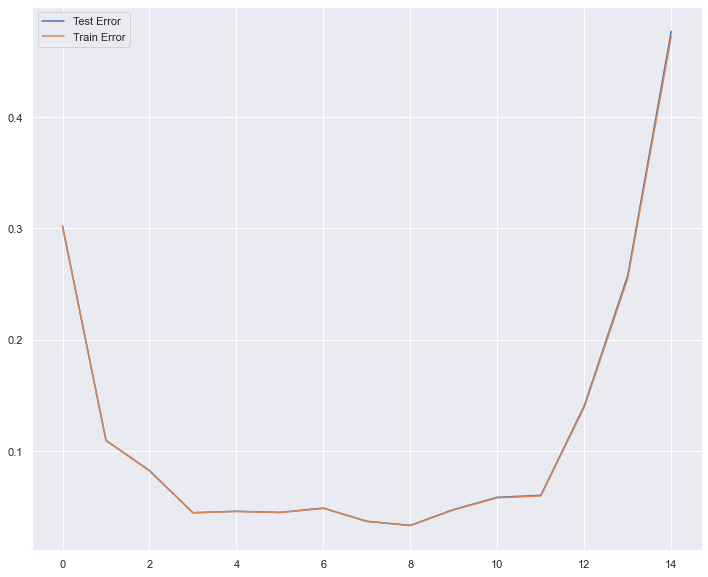

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

n = 50
maxdegree = 15
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

# let's make a mean of this stocastic results:
for time in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    for degree in range(maxdegree):
        model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
        clf = model.fit(x_train_scaled,y_train)
        y_fit = clf.predict(x_train_scaled)
        y_pred = clf.predict(x_test_scaled) 
        polydegree[degree] = degree
        TestError[degree] = (TestError[degree]*time + np.mean( np.mean((y_test - y_pred)**2) ))/(time+1)
        TrainError[degree] = (TestError[degree]*time + np.mean( np.mean((y_train - y_fit)**2) ))/(time+1)

for degree in range(maxdegree-1):
    grad=TestError[degree+1]-TestError[degree]
    print(grad)
    if grad>np.0.1:
        break
print("Suggestion of max optimized complexity, degree =", degree)
    
plt.figure(figsize=(12,10))
plt.plot(polydegree, TestError, label='Test Error')
plt.plot(polydegree, TrainError, label='Train Error')
plt.legend()
plt.show()

## **––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––**
From week 34:

### Organizing our data

Let us start with reading and organizing our data. 
We start with the compilation of masses and binding energies from 2016.
After having downloaded this file to our own computer, we are now ready to read the file and start structuring our data.


We start with preparing folders for storing our calculations and the data file over masses and binding energies. We import also various modules that we will find useful in order to present various Machine Learning methods. Here we focus mainly on the functionality of **scikit-learn**.

In [1]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("MassEval2016.dat"),'r')

FileNotFoundError: [Errno 2] No such file or directory: 'DataFiles/MassEval2016.dat'

Before we proceed, we define also a function for making our plots. You can obviously avoid this and simply set up various **matplotlib** commands every time you need them. You may however find it convenient to collect all such commands in one function and simply call this function.

In [ ]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

def MakePlot(x,y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label = labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

Code for SVD:

In [3]:
import numpy as np
# SVD inversion
def SVD(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, S, VT = np.linalg.svd(A,full_matrices=True)
    print('test U')
    print( (np.transpose(U) @ U - U @np.transpose(U)))
    print('test VT')
    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))
    print(U)
    print(S)
    print(VT)

    D = np.zeros((len(U),len(VT)))
    for i in range(0,len(VT)):
        D[i,i]=S[i]
    return U @ D @ VT


X = np.array([ [1.0,-1.0], [1.0,-1.0]])
#X = np.array([[1, 2], [3, 4], [5, 6]])

print(X)
C = SVD(X)
# Print the difference between the original matrix and the SVD one
print(C-X)

[[ 1. -1.]
 [ 1. -1.]]
test U
[[0. 0.]
 [0. 0.]]
test VT
[[0. 0.]
 [0. 0.]]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[2.00000000e+00 3.35470445e-17]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
[[-3.33066907e-16  4.44089210e-16]
 [ 0.00000000e+00  2.22044605e-16]]


In [4]:
import numpy as np
# SVD inversion
def SVDinv(A):
    ''' Takes as input a numpy matrix A and returns inv(A) based on singular value decomposition (SVD).
    SVD is numerically more stable than the inversion algorithms provided by
    numpy and scipy.linalg at the cost of being slower.
    '''
    U, s, VT = np.linalg.svd(A)
    print('test U')
    print( (np.transpose(U) @ U - U @np.transpose(U)))
    print('test VT')
    print( (np.transpose(VT) @ VT - VT @np.transpose(VT)))


    D = np.zeros((len(U),len(VT)))
    D = np.diag(s)
    UT = np.transpose(U); V = np.transpose(VT); invD = np.linalg.inv(D)
    return np.matmul(V,np.matmul(invD,UT))


#X = np.array([ [1.0, -1.0, 2.0], [1.0, 0.0, 1.0], [1.0, 2.0, -1.0], [1.0, 1.0, 0.0] ])
# Non-singular square matrix
X = np.array( [ [1,2,3],[2,4,5],[3,5,6]])
print(X)
A = np.transpose(X) @ X
# Brute force inversion
B = np.linalg.inv(A)  # here we could use np.linalg.pinv(A)
C = SVDinv(A)
print(np.abs(B-C))

[[1 2 3]
 [2 4 5]
 [3 5 6]]
test U
[[ 2.22044605e-16 -1.11362930e-15 -8.52945798e-16]
 [-1.11362930e-15  0.00000000e+00 -1.37835429e-16]
 [-8.52945798e-16 -1.37835429e-16 -1.11022302e-16]]
test VT
[[ 1.11022302e-16 -1.84228957e-16  2.68545647e-16]
 [-1.84228957e-16  0.00000000e+00 -6.33166055e-17]
 [ 2.68545647e-16 -6.33166055e-17 -1.11022302e-16]]
[[2.71604961e-12 2.34301467e-12 6.74127421e-13]
 [2.68585154e-12 2.30926389e-12 6.57252031e-13]
 [9.49462731e-13 8.13571432e-13 2.30038211e-13]]


In [ ]:
import numpy as np
# SVD inversion
def SVDinv(A):
    U, s, VT = np.linalg.svd(A)
    # reciprocals of singular values of s
    d = 1.0 / s
    # create m x n D matrix
    D = np.zeros(A.shape)
    # populate D with n x n diagonal matrix
    D[:A.shape[1], :A.shape[1]] = np.diag(d)
    UT = np.transpose(U)
    V = np.transpose(VT)
    return np.matmul(V,np.matmul(D.T,UT))


A = np.array([ [0.3, 0.4], [0.5, 0.6], [0.7, 0.8],[0.9, 1.0]])
print(A)
# Brute force inversion of super-collinear matrix
B = np.linalg.pinv(A)
print(B)
# Compare our own algorithm with pinv
C = SVDinv(A)
print(np.abs(C-B))

Ridge and Lasso Regression:

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.

X = np.array( [ [ 2, 0], [0, 1], [0,0]])
y = np.array( [4, 2, 3])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X.T @ X+lmb*I) @ X.T @ y
    #print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X @ Ridgebeta
    MSERidgePredict[i] = MSE(y,ypredictRidge)
    RegLasso = linear_model.Lasso(lmb)
    RegLasso.fit(X,y)
    ypredictLasso = RegLasso.predict(X)
    #print(RegLasso.coef_)
    MSELassoPredict[i] = MSE(y,ypredictLasso)
# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSERidgePredict, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSELassoPredict, 'b--', label = 'MSE Lasso Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()